In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')

ad_id – идентификатор объявления (рекламы)

xyz_campaign_id – идентификатор рекламной кампании в базе компании X

fb_campaign_id – идентификатор кампании в Facebook

age – возрастная группа, которой показывалась реклама

gender – пол тех, кому показывалась реклама

interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)

impressions – число показов

clicks – число кликов

spent – сумма, которую компания потратила на показ объявления 

total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы

approved_conversion – количество людей, которые купили продукт после просмотра рекламы


### Проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [2]:
conversion = pd.read_csv('conversion.csv')

In [3]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
conversion.shape

(1143, 11)

### Кол-во уникальных рк

In [5]:
conversion.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [6]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### Сколько уникальных рекламных кампаний было проведено? 

In [8]:
conversion.xyz_campaign_id.nunique()

3

### Построим график распределения числа показов 
### (Impressions – сколько раз пользователи увидели данное объявление) 

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions'>

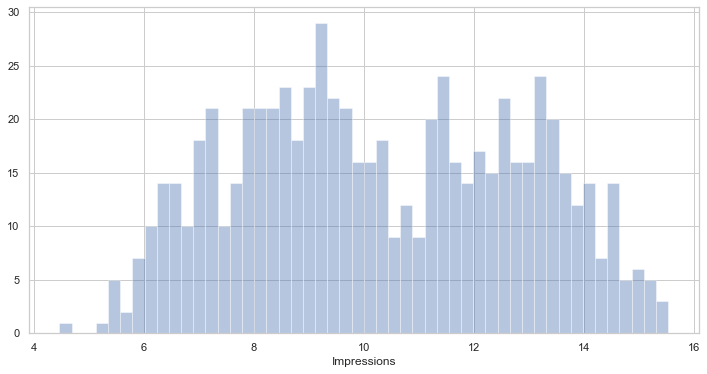

In [9]:
sns.distplot(np.log(conversion.groupby('fb_campaign_id').Impressions.sum()), kde = False, bins = 50)

### Полученное распределение не является нормальным
### Распределение бимодальное

### Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), 
### которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

### Создайте новую колонку, затем посмотрите на описательные статистики. 
### Найдем ad_id объявления с наибольшим CTR.

In [10]:
conversion['CTR'] = conversion.Clicks/conversion.Impressions

In [11]:
conversion.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [12]:
conversion.iloc[conversion.CTR.idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

In [13]:
conversion.iloc[conversion.CTR.idxmax()]['ad_id']

738637

### Визуализируем CTR с разбивкой по номеру рекламной кампании 916 (xyz_campaign_id). 

### Note: параметр bins=20.

In [14]:
ctr_916 = conversion.query('xyz_campaign_id == 916')['CTR']

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


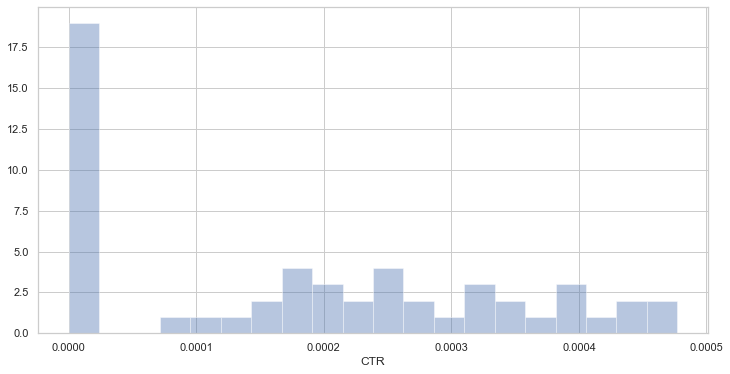

In [15]:
ax = sns.distplot(ctr_916, kde = False, bins=20)

### CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
### Рассчитывается путём деления суммы потраченных денег на общее число кликов:

### Выведем описательные статистики для новой переменной, 
### посмотрим на форму распределения. 

### следует указать аргумент nan_policy='omit', 
### чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [16]:
conversion['CPC'] = conversion.Spent / conversion.Clicks

In [17]:
conversion['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC'>

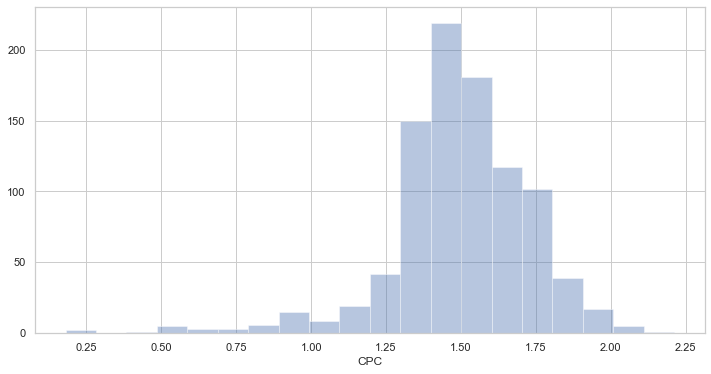

In [18]:
sns.distplot(conversion.dropna().CPC, bins = 20, kde = False)

In [19]:
round(stats.iqr(conversion.CPC, nan_policy='omit'), 2)

0.25

# Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления. 

/Users/denis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

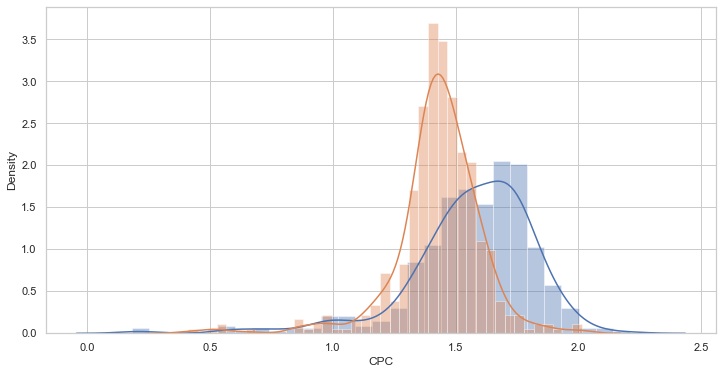

In [20]:
sns.distplot(conversion.query("gender == 'M'").CPC.dropna())
sns.distplot(conversion.query("gender == 'F'").CPC.dropna())

### Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

### Посчитаем конверсию из клика в покупку. 
### Найдем конверсию для объявления 1121814 в процентах, 

### Note: клики – Clicks, покупки – Approved_Conversion.

In [21]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [22]:
conversion['CR'] = (conversion.Approved_Conversion / conversion.Clicks).mul(100)

In [23]:
round(conversion.query('ad_id == 1121814')['CR'], 2)

860    3.09
Name: CR, dtype: float64

# 3.09